## Explore data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
job_change = pd.read_csv('data/aug_train.csv')

In [7]:
job_change.shape

(19158, 14)

In [8]:
job_change.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [9]:
job_change.nunique(axis=0)

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
job_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
job_change.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [12]:
job_change.median()

enrollee_id               16982.500
city_development_index        0.903
training_hours               47.000
target                        0.000
dtype: float64

In [13]:
temp = job_change[["city_development_index", "training_hours", "target"]]

In [14]:
corr_temp = temp.corr()

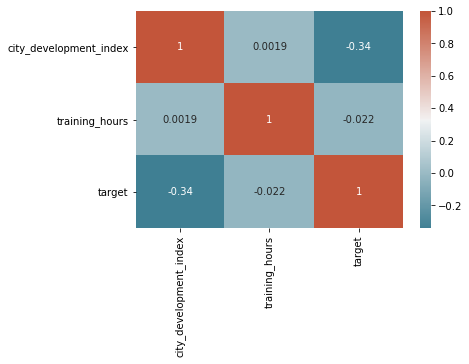

In [15]:
sns.heatmap(corr_temp, xticklabels=corr_temp.columns, yticklabels=corr_temp.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

city_developement_index influence the target the most among the numerical variable

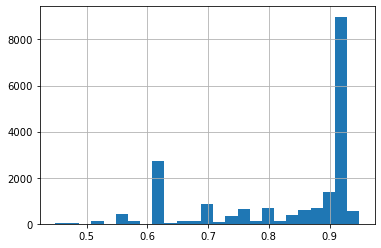

In [16]:
job_change["city_development_index"].hist(bins=25)

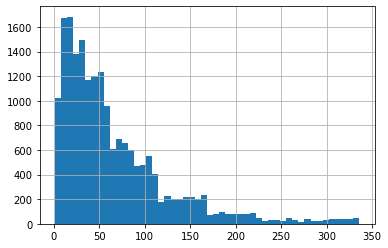

In [17]:
job_change["training_hours"].hist(bins=50)

In [18]:
ord_cat_attribs_without_experience = ['relevent_experience', 'enrolled_university', 'education_level', 'company_size', 'last_new_job']

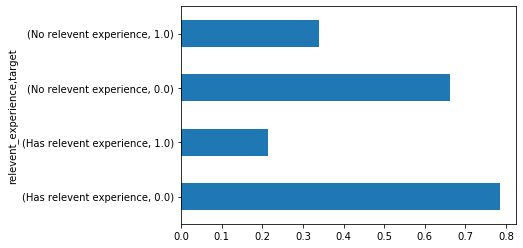

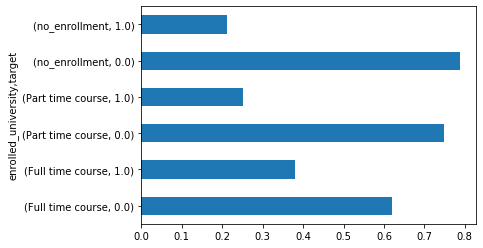

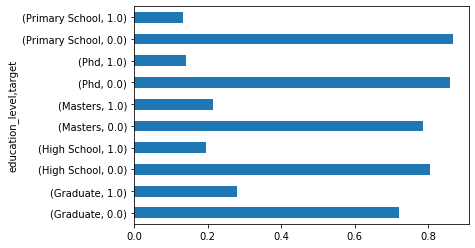

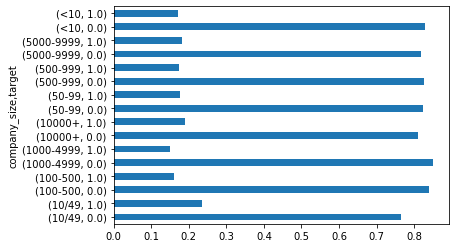

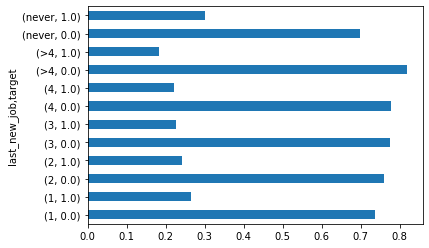

In [19]:
for col in ord_cat_attribs_without_experience:
    ax = job_change.groupby(col).target.value_counts(normalize=True).plot(kind="barh")
    plt.show()

Upon inspecting the above graph we have the following conclusions:

- People who have relevent experience is less likely to change job
- People who enrolled in university full time is more likely to change job
- Graduate is the most likely to change job, while people who has PhD or Primary School degree is less likely to change job
- In general, company size doesn't significantly influence whether a person change job or not
- The less time between the last job and the current job, the more likely a person will change the job. Most noticeably, people who never have a job are the most likely to change job

In [20]:
nom_cat_attribs = ['gender', 'major_discipline', 'company_type']

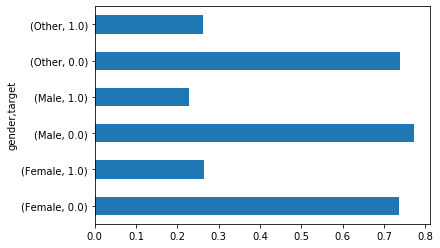

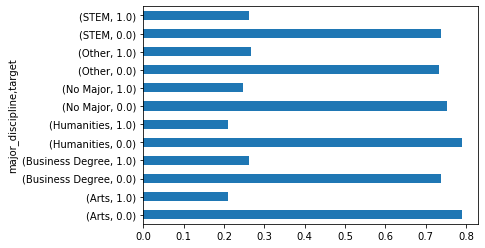

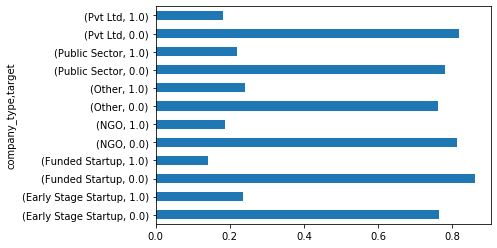

In [21]:
for col in nom_cat_attribs:
    ax = job_change.groupby(col).target.value_counts(normalize=True).plot(kind="barh")
    plt.show()

Upon inspecting the above graph, here are the conclusion:

- There are no difference between genders
- In general, people who study Humanities or Art (which is less related to Data Science) are slightly less likely to change job
- People from Funded Startup are less likely to change job